In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [2]:
tennis = pd.read_csv(r"C:\Users\jugil\Documents\Cursos\CodeAcademy\Machine Learning Career Path\Course 6. Machine Learning I\Module 1. Supervised Learning - Regressors, Classifiers and Trees\tennis_ace_starting\tennis_stats.csv")
tennis.head(10)                

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.10,0.26,9,0.67,0.44,0.64,0,1,10434,495
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,...,0.20,0.35,9,0.56,0.45,0.58,0,1,24218,1107
7,Riccardo Bellotti,2017,0.76,0.55,0.35,0.39,0.41,0,0.50,9,...,0.31,0.37,14,0.57,0.45,0.51,0,1,61154,432
8,Austin Krajicek,2017,0.76,0.78,0.16,0.57,0.49,9,0.25,3,...,0.06,0.30,16,0.88,0.50,0.73,0,1,52940,291
9,Guilherme Clezar,2011,0.76,0.56,0.24,0.46,0.13,3,0.00,5,...,0.00,0.21,8,0.63,0.38,0.54,0,1,18829,241


In [3]:
tennis.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

In [4]:
tennis.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


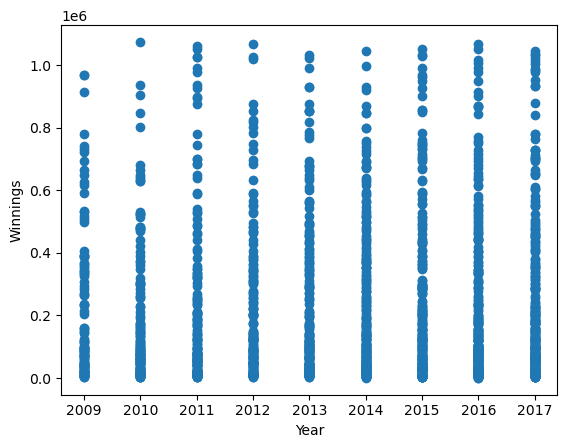

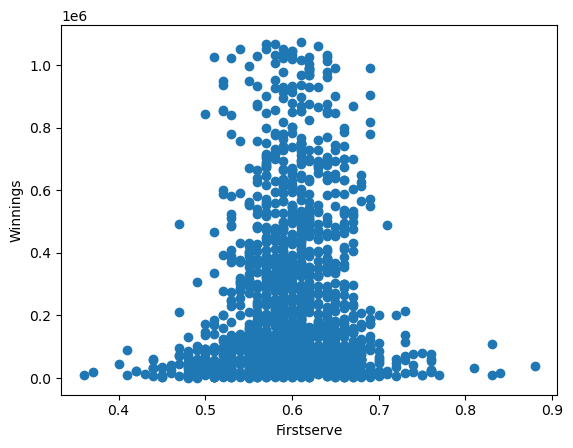

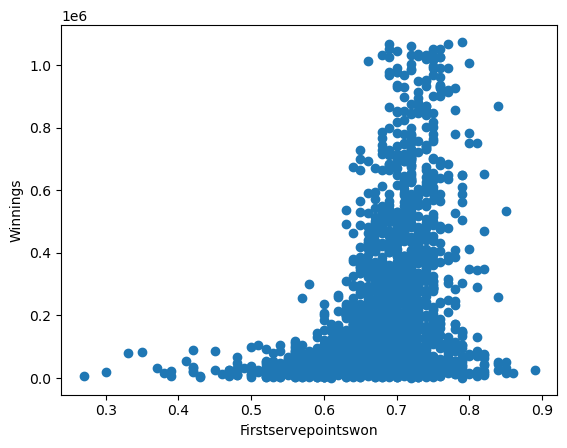

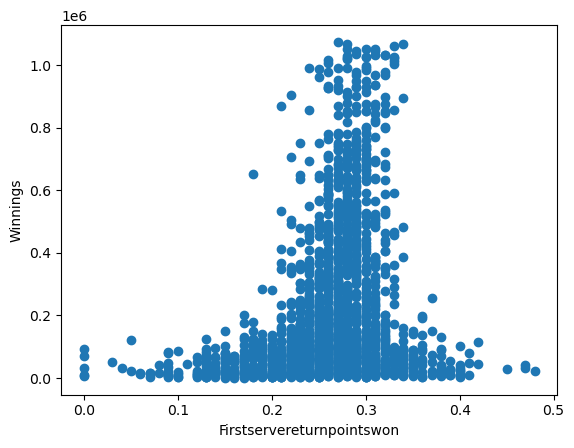

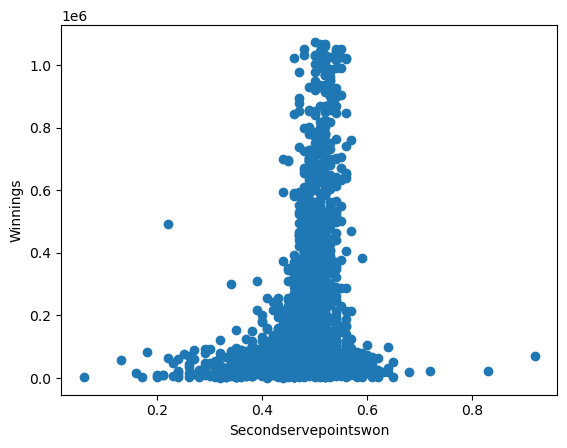

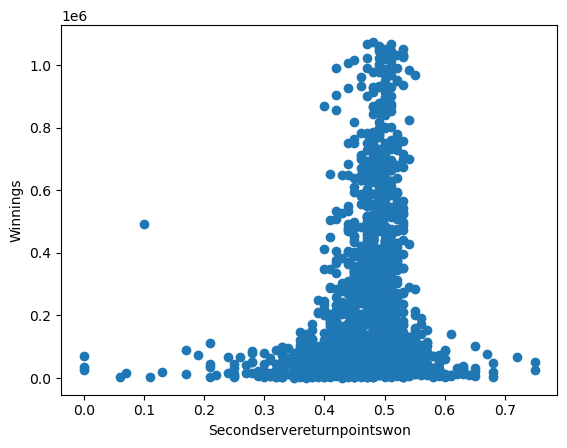

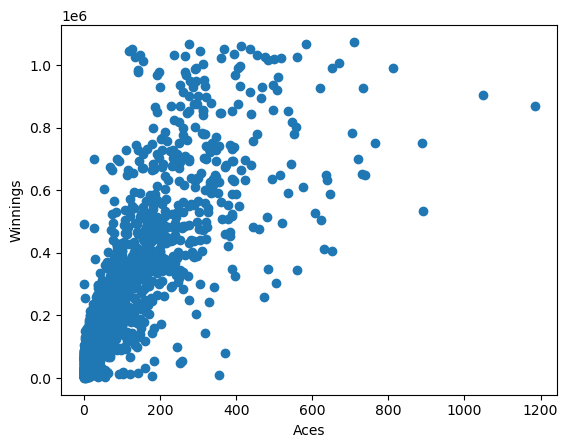

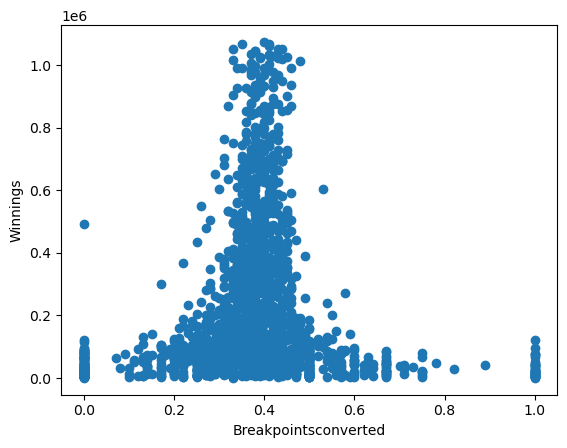

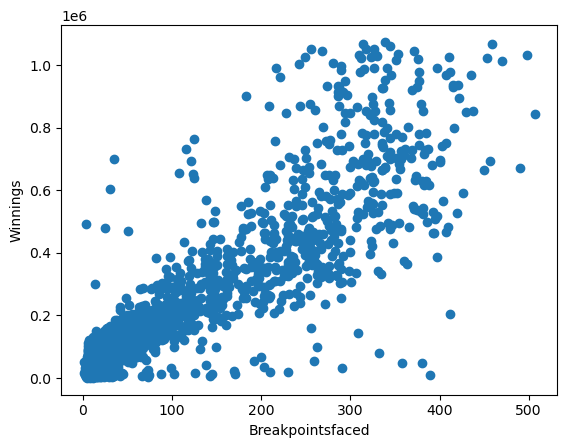

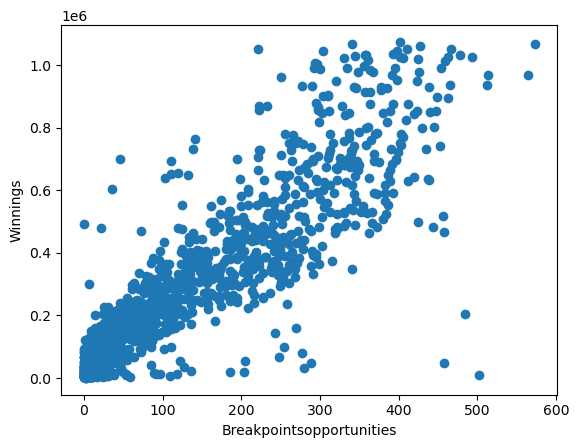

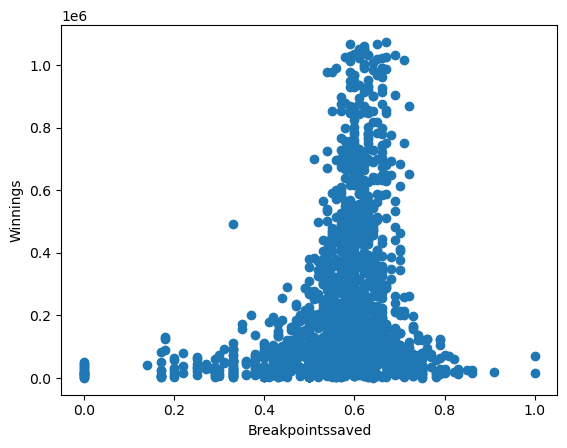

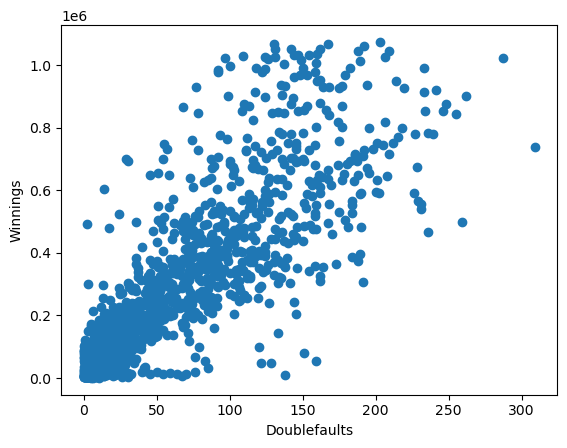

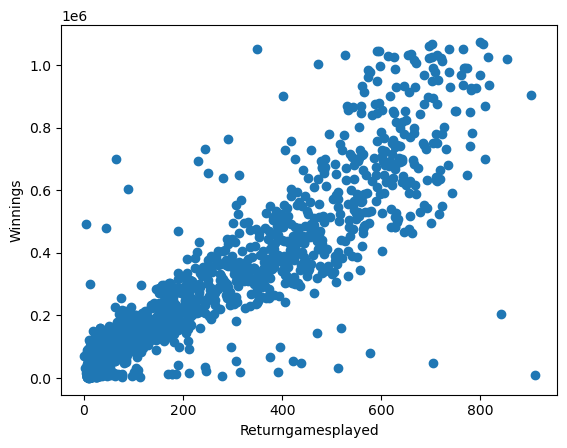

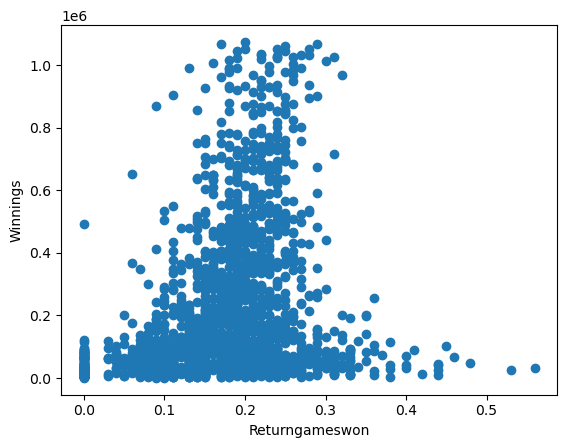

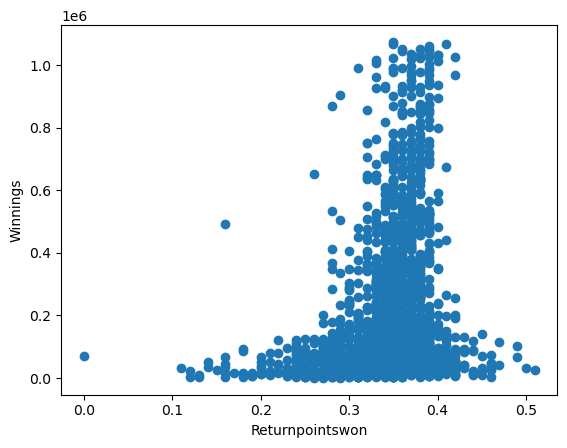

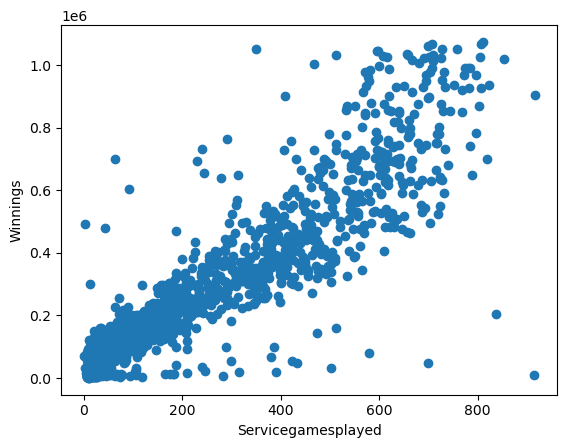

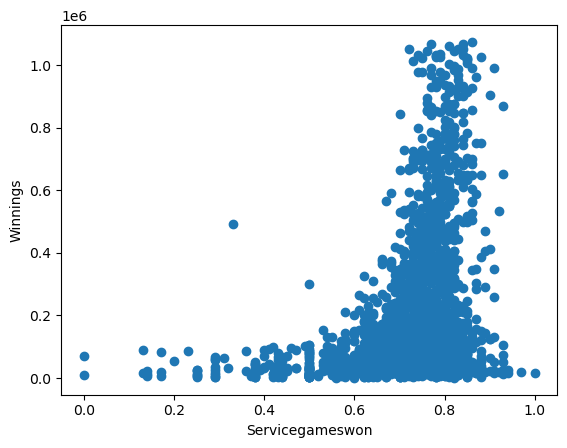

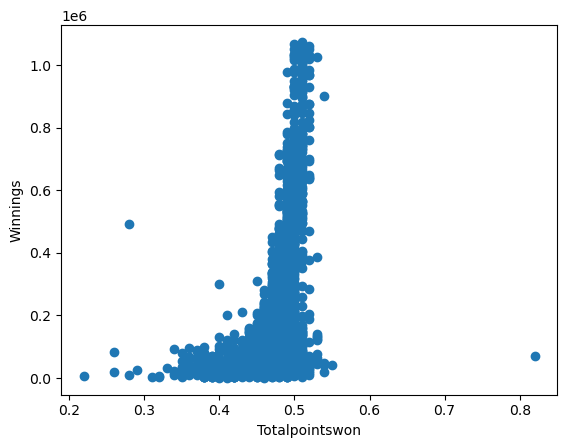

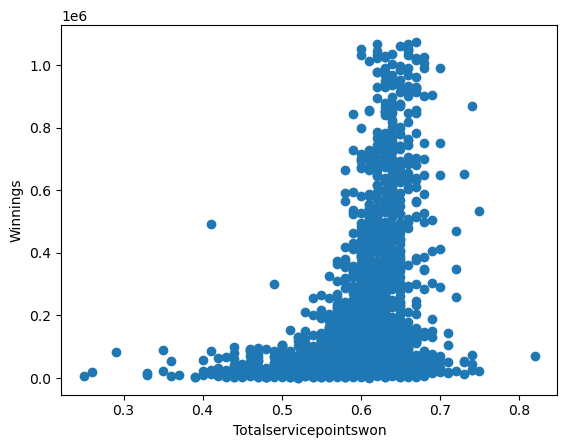

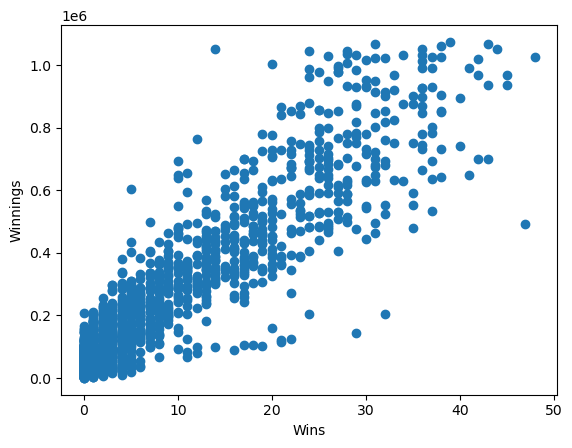

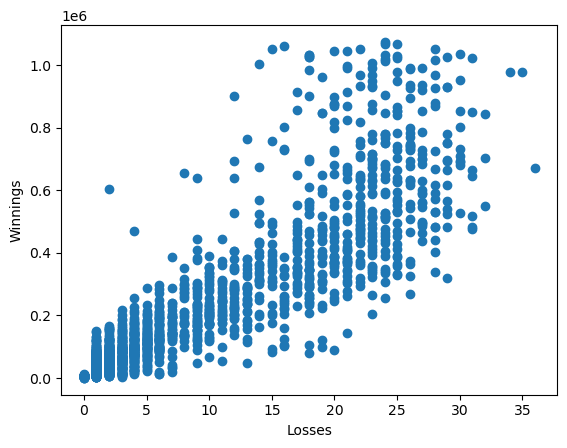

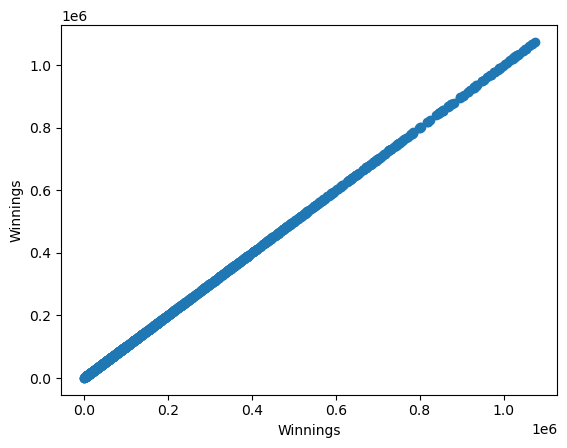

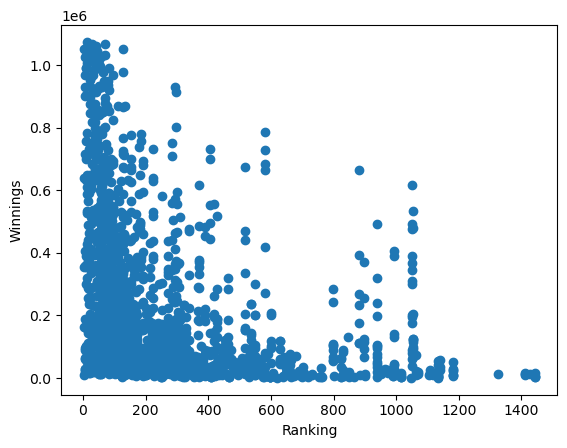

<Figure size 640x480 with 0 Axes>

In [5]:
for col in tennis.columns:
    if tennis[col].dtype != 'object':
        plt.scatter(tennis[col], tennis.Winnings)
        plt.xlabel(col.title())
        plt.ylabel('Winnings')
        plt.show()
        plt.clf()

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


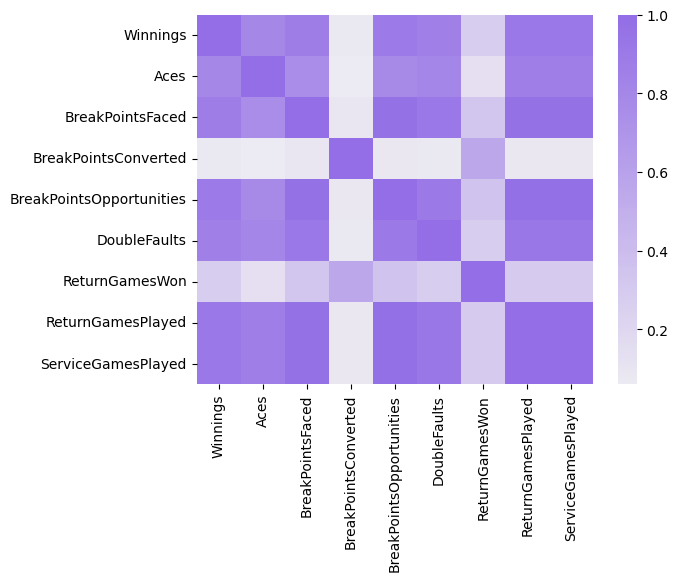

In [6]:
import seaborn as sns
print(tennis.columns)
tennis_num = tennis[['Winnings', 'Aces', 'BreakPointsFaced', 'BreakPointsConverted','BreakPointsOpportunities', 'DoubleFaults','ReturnGamesWon', 'ReturnGamesPlayed', 'ServiceGamesPlayed']]
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(tennis_num.corr(), center=0, cmap=colors, robust=True)
plt.show()


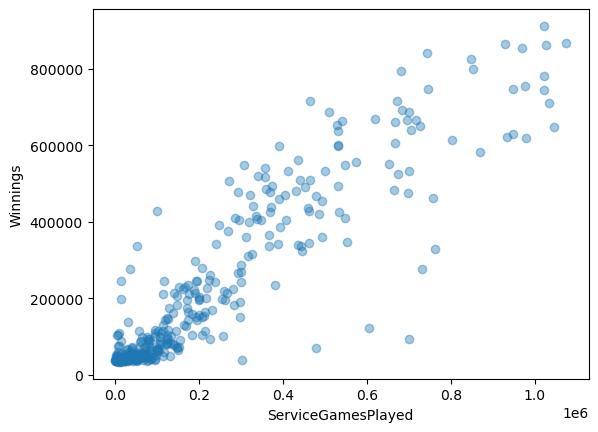

0.8367824244723853
0.8209004111105332


In [24]:
import numpy as np
model1 = tennis[['ServiceGamesPlayed', 'Winnings']]
X = np.array(model1.ServiceGamesPlayed).reshape(-1,1)
y = np.array(model1.Winnings).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
model1_regr = LinearRegression()
model1_regr.fit(x_train, y_train)
y_predict = model1_regr.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel(model1.columns[0])
plt.ylabel(model1.columns[1])
plt.show()
print(model1_regr.score(x_train, y_train))
print(model1_regr.score(x_test, y_test))


Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

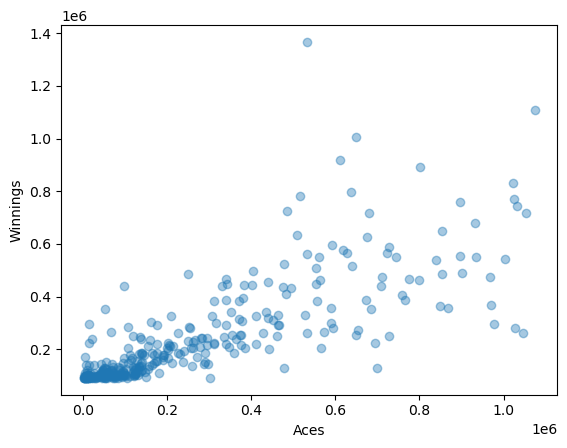

0.6450191140325552
0.6070025994639761


In [31]:
model2 = tennis[['Aces', 'Winnings']]
X = np.array(model2.Aces).reshape(-1,1)
y = np.array(model2.Winnings).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
model2_regr = LinearRegression()
model2_regr.fit(x_train, y_train)
y_predict = model2_regr.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel(model2.columns[0])
plt.ylabel(model2.columns[1])
plt.show()
print(model2_regr.score(x_train, y_train))
print(model2_regr.score(x_test, y_test))

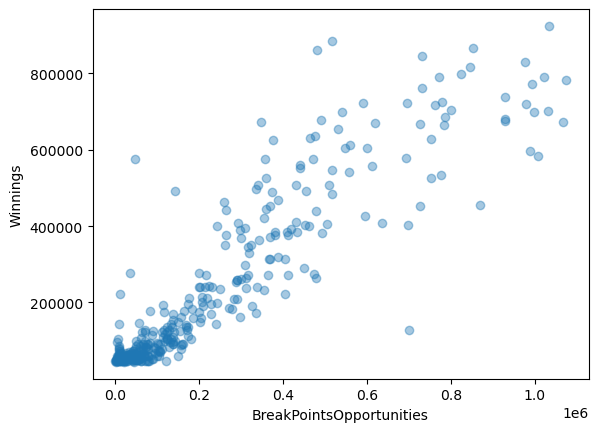

0.8080422126130486
0.820489031217757


In [26]:
model3 = tennis[['BreakPointsOpportunities', 'Winnings']]
X = np.array(model3.BreakPointsOpportunities).reshape(-1,1)
y = np.array(model3.Winnings).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
model3_regr = LinearRegression()
model3_regr.fit(x_train, y_train)
y_predict = model3_regr.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel(model3.columns[0])
plt.ylabel(model3.columns[1])
plt.show()
print(model3_regr.score(x_train, y_train))
print(model3_regr.score(x_test, y_test))

In [13]:
# Scaling Winnings and re-evaluation model 1 (Greatest score)
model1.describe()

,ServiceGamesPlayed,Winnings
count,1721.000000,1.721000e+03
mean,197.650203,2.344928e+05
std,221.208703,2.530537e+05
min,0.000000,1.080000e+02
25%,22.000000,4.931100e+04
50%,86.000000,1.252120e+05
75%,348.000000,3.500750e+05
max,916.000000,1.074562e+06


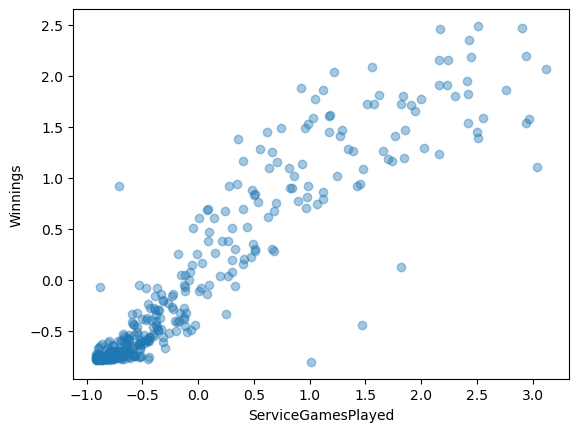

0.8290082285604292
0.8513191890989078


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

model1 = tennis[['ServiceGamesPlayed', 'Winnings']]
scaled_winnings = scaler.fit_transform(np.array(model1.Winnings).reshape(-1, 1))
X = np.array(model1.ServiceGamesPlayed).reshape(-1,1)
y = scaled_winnings
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
model1_regr = LinearRegression()
model1_regr.fit(x_train, y_train)
y_predict = model1_regr.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel(model1.columns[0])
plt.ylabel(model1.columns[1])
plt.show()
print(model1_regr.score(x_train, y_train))
print(model1_regr.score(x_test, y_test))

Create a linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

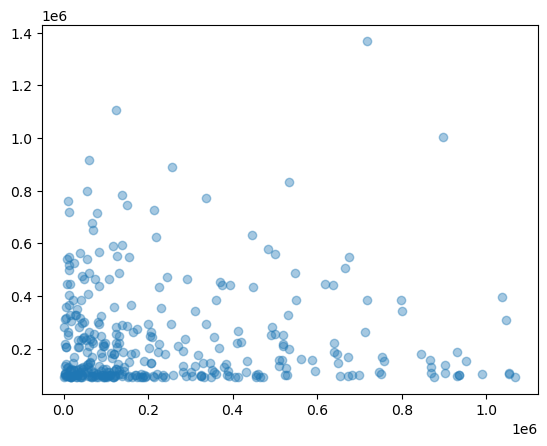

0.8365238713484848
0.8275332668837072


In [37]:
#Without Scaling 

X = tennis[['ServiceGamesPlayed', 'BreakPointsOpportunities']]
y = tennis['Winnings']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predicted = mlr.predict(x_train)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.show()
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

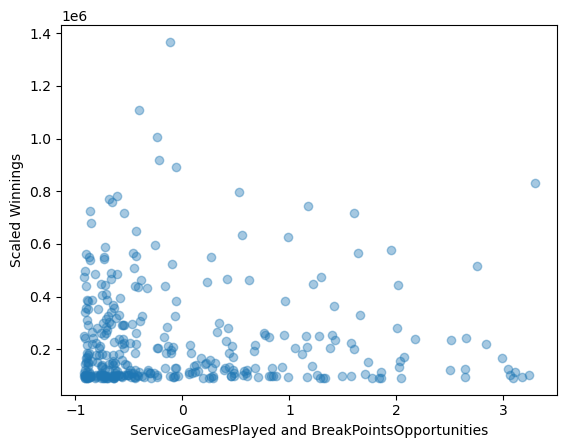

0.8313582738558015
0.8466059123867838


In [47]:
#With Scaling 

X = tennis[['ServiceGamesPlayed', 'BreakPointsOpportunities']]
y = scaled_winnings

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predicted = mlr.predict(x_train)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('ServiceGamesPlayed and BreakPointsOpportunities')
plt.ylabel('Scaled Winnings')
plt.show()
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

In [70]:
X = tennis[['ServiceGamesPlayed', 'BreakPointsOpportunities', 'ReturnGamesPlayed', 'BreakPointsFaced']]
y = scaled_winnings

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predicted = mlr.predict(x_train)
#plt.scatter(y_test, y_predict, alpha=0.4)
#plt.xlabel('ServiceGamesPlayed and BreakPointsOpportunities')
#plt.ylabel('Scaled Winnings')
#plt.show()
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.8277126089357268
0.8804356986354017
